# **Free AI Course**

## **Standard (Fully Connected) Neural Network**

we will learn the following:

1.Loading dataset\
2.Preprocessing the dataset\
3.Defination of Neural Network\
4.Training a Neural Network\
5.Testing a Neural Network

**Loading Required packages and Data**

In [2]:
# Load Data and plot Data
# from tensorflow.keras.datasets import.mnist
import tensorflow as tf  # framework for Deep learning
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# import tensorflow as tf
# from tensorflow.keras import layers, models
# import matplotlib.pyplot as plt

In [3]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist


**Data Splitting**

In [4]:
# splitting the data into test and train set
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


**Dataset Display**

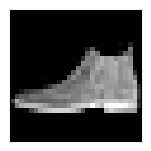

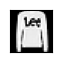

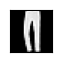

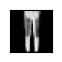

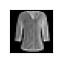

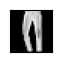

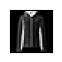

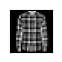

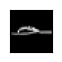

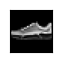

In [5]:
import matplotlib.pyplot as plt

# Number of images to display
n = 10

# Create a figure to display images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
  # Create a subplot within the figure
  ax = plt.subplot(2, n, i + 1)

  # Display the origional image
  plt.imshow(X_test[i].reshape(28, 28))

  # Set colormap to grayscale
  plt.gray()

  # Hide x_axis and y_axis labels and ticks
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Show the figure with the images
  plt.show()

  # Close the figure
  plt.close()


**Flattening the images**

In [6]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious Y_train shape: {}".format(X_train.shape, Y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape: (60000,)


# **Min-Max Scaling**

In [7]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to a range between 0 and 1 #zero is for Black #1 for white image
X_train /= 255
X_test /=  255

**Processing the Target Variable**

In [8]:
# Number of classed in the dataset
classes = 10
# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape:{} \nNew Y_train shape;{}".format(X_train.shape, Y_train.shape))



New X_train shape:(60000, 784) 
New Y_train shape;(60000, 10)


**Setting up Hyper-parameters**

In [9]:
# before the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 200

# Define the number of neurons in the first hidden layer
hidden1 = 400
# Define the number of neurons in the second layer
hidden2 = 20

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 10


**Bulding the FCN Model**

In [12]:
# 4. Build the model

# Create a sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))

# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes,activation='softmax'))

# Compilation

# compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentrophy',
              metrics=['accuracy'], optimizer='sgd')

# Display the summary of the model architecture , showing the layers and parameter counts
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dense_4 (Dense)             (None, 20)                8020      
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training The Model**

In [15]:
# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0089 - accuracy: 0.9979
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0044 - accuracy: 0.9992
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 6.9783e-04 - accuracy: 0.9999
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 3.8363e-04 - accuracy: 1.0000
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0137 - accuracy

**Testing The Model**

In [16]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9778
Test accuracy: 97.78%


----------------------------------------------------------------------------------

**Whole code in one Cell**

In [14]:
# Import necessary libraries
import numpy as np
from time import time
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious Y_train shape: {}".format(X_train.shape, Y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

# Convert labels to categorical one-hot encoding
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Define the model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the hyperparameters
batch_size = 128
epochs = 10

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test accuracy: {:.2f}%".format(test_acc * 100))


11490434/11490434 [==============================] - 1s 0us/step
Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape: (60000,)
Epoch 1/10
469/469 [==============================] - 7s 7ms/step - loss: 0.2690 - accuracy: 0.9241
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1088 - accuracy: 0.9679
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0698 - accuracy: 0.9796
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9860
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0359 - accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0274 - accuracy: 0.9925
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0195 - accuracy: 0.9949
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0154 - accuracy: 0.9959
Epoch 9/10
469/469 [==============================] - 4s 8ms/